## Background:##

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description: ##

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

## Goal(s): ##

Predict if a customer is happy or not based on the answers they give to questions asked.

## Success Metrics: ##

Reach 73% F1 score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

## Bonus(es): ##

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [102]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import f1_score

df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.columns = ['happy_customer','delivered_on_time', 'contents_as_expected', 'ordered_everything', 'good_price', 'satisfied_w_courier', 'app_ease_of_use']
print(df.shape)
print("\n")
print(df.info())

print("\n Check if variables have the right values")
print("unique values for happy_customer: ",df['happy_customer'].unique())
print("unique values for delivered_on_time: ",df['delivered_on_time'].unique())
print("unique values for contents_as_expected: ",df['contents_as_expected'].unique())
print("unique values for ordered_everything: ",df['ordered_everything'].unique())
print("unique values for good_price: ",df['good_price'].unique())
print("unique values for satisfied_w_courier: ",df['satisfied_w_courier'].unique())
print("unique values for app_ease_of_use: ",df['app_ease_of_use'].unique())

# Split the Data into Dependent and Independent Variables
print("\n")
X = df.drop('happy_customer', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
y = df['happy_customer'].copy()

# One-Hot Encoding - There's no need to convert this using one hot encoding as all the independent variables are ordinal in nature
# and their order is preserved by using integers

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
print("check if dependent variable is stratified between train and test datasets")
print(sum(y_train)/len(y_train))
print(sum(y_train)/len(y_train))

(126, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   happy_customer        126 non-null    int64
 1   delivered_on_time     126 non-null    int64
 2   contents_as_expected  126 non-null    int64
 3   ordered_everything    126 non-null    int64
 4   good_price            126 non-null    int64
 5   satisfied_w_courier   126 non-null    int64
 6   app_ease_of_use       126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None

 Check if variables have the right values
unique values for happy_customer:  [0 1]
unique values for delivered_on_time:  [3 5 4 1]
unique values for contents_as_expected:  [3 2 4 5 1]
unique values for ordered_everything:  [3 2 4 5 1]
unique values for good_price:  [4 5 3 2 1]
unique values for satisfied_w_courier:  [2 4 3 5 1]
unique values for app_ease_of_use:  [4 3 5 2 1]


check if dependent v

# Exploratory Data Analysis

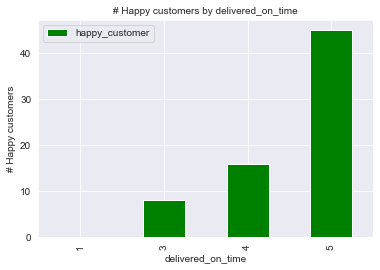

In [118]:
df_1 = df.groupby(['delivered_on_time']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by delivered_on_time", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

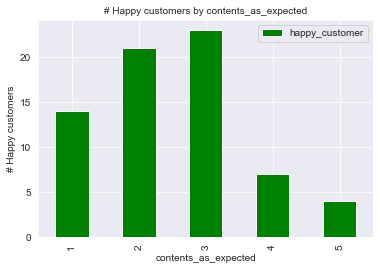

In [119]:
df_1 = df.groupby(['contents_as_expected']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by contents_as_expected", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

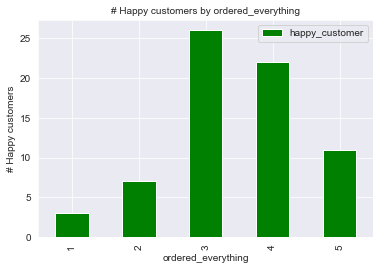

In [120]:
df_1 = df.groupby(['ordered_everything']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by ordered_everything", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

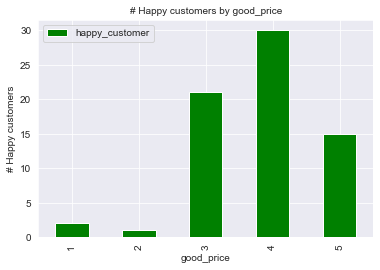

In [121]:
df_1 = df.groupby(['good_price']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by good_price", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

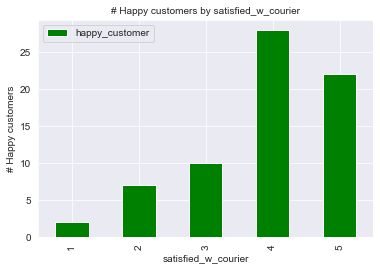

In [122]:
df_1 = df.groupby(['satisfied_w_courier']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by satisfied_w_courier", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

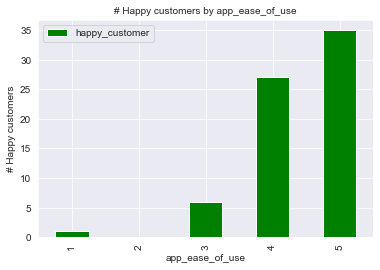

In [123]:
df_1 = df.groupby(['app_ease_of_use']).agg({'happy_customer':np.sum})
ax = df_1.plot(kind='bar', figsize=(6,4), color="green", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("# Happy customers by app_ease_of_use", fontsize=10)
ax.set_ylabel("# Happy customers", fontsize=10)
plt.show()
del df_1

# Forward stepwise variable selection 

In [103]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
def auc(variables, target, df):
    X = df[variables]
    y = df[target]
    logreg = linear_model.LogisticRegression(solver = 'lbfgs', class_weight="balanced")
    logreg.fit(X, y.values.ravel())
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

def next_best(current_variables, candidate_variables, target, df_ride_exp_model):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, df_ride_exp_model)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable, best_auc

current_variables = []
target = ['happy_customer']
candidate_variables = ['delivered_on_time','satisfied_w_courier','app_ease_of_use','ordered_everything','contents_as_expected','good_price']
max_number_variables = 10
number_iterations = min(max_number_variables, len(candidate_variables))
# print(number_iterations)
for i in range(0, number_iterations):
    next_variable, next_auc = next_best(current_variables, candidate_variables, target, df)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + " with AUC = " + str(next_auc))
print(current_variables)

Variable added in step 1 is delivered_on_time with AUC = 0.6536994660564455
Variable added in step 2 is ordered_everything with AUC = 0.6810322908721078
Variable added in step 3 is contents_as_expected with AUC = 0.6877701500127129
Variable added in step 4 is good_price with AUC = 0.6922196796338672
Variable added in step 5 is satisfied_w_courier with AUC = 0.6878972794304602
Variable added in step 6 is app_ease_of_use with AUC = 0.6824307144673277
['delivered_on_time', 'ordered_everything', 'contents_as_expected', 'good_price', 'satisfied_w_courier', 'app_ease_of_use']


## Spearman's Rank Correlation Coefficient Between Ordinal Variables ##
Check Spearman's rank correlation between all variables and satisfied_w_courier and app_ease_of_use as for satisfied_w_courier and app_ease_of_use variables, the AUC doesn't improve when added using forward selection

In [104]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# calculate spearman's correlation
print("\nSpearman's rank correlation coefficient between other variables and satisfied_w_courier:")
print(spearmanr(df['delivered_on_time'], df['satisfied_w_courier']))
print(spearmanr(df['ordered_everything'], df['satisfied_w_courier']))
print(spearmanr(df['contents_as_expected'], df['satisfied_w_courier']))
print(spearmanr(df['good_price'], df['satisfied_w_courier']))

print("\nSpearman's rank correlation coefficient between other variables and app_ease_of_use:")
print(spearmanr(df['delivered_on_time'], df['app_ease_of_use']))
print(spearmanr(df['ordered_everything'], df['app_ease_of_use']))
print(spearmanr(df['contents_as_expected'], df['app_ease_of_use']))
print(spearmanr(df['good_price'], df['app_ease_of_use']))

print("\n")
print(spearmanr(df['satisfied_w_courier'], df['app_ease_of_use']))


Spearman's rank correlation coefficient between other variables and satisfied_w_courier:
SpearmanrResult(correlation=0.4227857991090052, pvalue=8.150030785542712e-07)
SpearmanrResult(correlation=0.40635618182308225, pvalue=2.344194775361821e-06)
SpearmanrResult(correlation=0.03007040567152563, pvalue=0.738190099106355)
SpearmanrResult(correlation=0.30501165525225193, pvalue=0.0005151383605396815)

Spearman's rank correlation coefficient between other variables and app_ease_of_use:
SpearmanrResult(correlation=0.5128545123426709, pvalue=8.268797920459071e-10)
SpearmanrResult(correlation=0.1797536761868838, pvalue=0.04400353989838062)
SpearmanrResult(correlation=-0.03714719869650577, pvalue=0.6796335866911016)
SpearmanrResult(correlation=0.1413812343645823, pvalue=0.11430694414134074)


SpearmanrResult(correlation=0.33006583707432846, pvalue=0.00016039504478403835)


# Observations based on variable selection
While doing forward stepwise variable selection, we found that the AUC continues to improve when we add these four variables: 'delivered_on_time', 'ordered_everything', 'contents_as_expected', 'good_price' but starts to decrease when we add 'satisfied_w_courier' and 'app_ease_of_use' variables. In the next step, we checked the Spearman's rank correlation between all variables and these two variables and found that there's a high statistical significant correlation of >0.5 between 'delivered_on_time' and 'app_ease_of_use' variables, and since 'app_ease_of_use' doesn't improve the AUC while variable selection, we can ignore it while modeling.

But this seems a bit counter intuitive too as intuitively, 'delivered_on_time' and 'satisfied_w_courier' variables should have higher correlation. [TO DISCUSS]

In [105]:
X_select = df[['delivered_on_time','contents_as_expected','ordered_everything','good_price','satisfied_w_courier']]
X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, random_state=42, stratify=y)

# Build a Preliminary XGBoost Model
**NOTE:** Instead of determining the optimal number of trees with cross validation, we will use early stopping to stop building trees when they no longer improve the situation.

[0]	validation_0-aucpr:0.849604
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.849604
[2]	validation_0-aucpr:0.849604
[3]	validation_0-aucpr:0.849975
[4]	validation_0-aucpr:0.853912
[5]	validation_0-aucpr:0.851419
[6]	validation_0-aucpr:0.790728
[7]	validation_0-aucpr:0.789598
[8]	validation_0-aucpr:0.78485
[9]	validation_0-aucpr:0.790989
[10]	validation_0-aucpr:0.787974
[11]	validation_0-aucpr:0.789598
[12]	validation_0-aucpr:0.786583
[13]	validation_0-aucpr:0.785292
[14]	validation_0-aucpr:0.786583
Stopping. Best iteration:
[4]	validation_0-aucpr:0.853912


F1 score is:  0.7999999999999999


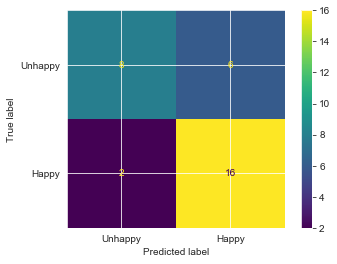

In [106]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train_select, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test_select, y_test)])


y_pred = clf_xgb.predict(X_test_select)
print("\nF1 score is: ", f1_score(y_test, y_pred))

plot_confusion_matrix(clf_xgb, 
                      X_test_select, 
                      y_test,
                      values_format='d',
                      display_labels=["Unhappy", "Happy"])

# Observations based on the preliminary model
Recall or Sensitivity or TPR = 16/18 = 89% which means 89% of the customers who are happy are correctly classified.<br />Specificity = 8/14 = 57% which means 57% of the customers who are unhappy are correctly classified.<br />
Precision = 16/22 = 73%.<br />

F1 score of 80%.

# Optimize Parameters using Cross Validation and GridSearch()
**XGBoost** has a lot of *hyperparameters*, parameters that we have to manual configure and are not determined by **XGBoost** itself, including `max_depth`, the maximum tree depth, `learning_rate`, the learning rate, or "eta", `gamma`, the parameter that encourages pruning, and `reg_lambda`, the regularization parameter lambda. So let's try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with the **Testing Dataset**.

**NOTE:** Since we have many hyperparameters to optimize, we will use `GridSearchCV()`. We specify a bunch of potential values for the hyperparameters and `GridSearchCV()` tests all possible combinations of the parameters for us.

{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 1.0, 'scale_pos_weight': 3}


[0]	validation_0-aucpr:0.775684
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.836597
[2]	validation_0-aucpr:0.742895
[3]	validation_0-aucpr:0.79869
[4]	validation_0-aucpr:0.820929
[5]	validation_0-aucpr:0.824976
[6]	validation_0-aucpr:0.907917
[7]	validation_0-aucpr:0.900357
[8]	validation_0-aucpr:0.881364
[9]	validation_0-aucpr:0.88704
[10]	validation_0-aucpr:0.88704
[11]	validation_0-aucpr:0.872888
[12]	validation_0-aucpr:0.873333
[13]	validation_0-aucpr:0.837801
[14]	validation_0-aucpr:0.849656
[15]	validation_0-aucpr:0.820279
[16]	validation_0-aucpr:0.816783
Stopping. Best iteration:
[6]	validation_0-aucpr:0.907917


F1 score is:  0.8205128205128205


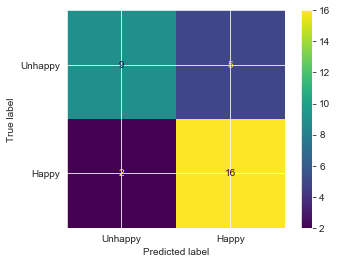

In [101]:
# ## NOTE: When data are imbalanced, the XGBoost manual says...
# ## If you care only about the overall performance metric (AUC) of your prediction
# ##     * Balance the positive and negative weights via scale_pos_weight
# ##     * Use AUC for evaluation

## ROUND 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
}
## Output: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
## Because learning_rate and reg_lambda were at the ends of their range, we will continue to explore those...

## NOTE: To speed up cross validiation, and to further prevent overfitting.
## We are only using a random subset of the data (90%) and are only
## using a random subset of the features (columns) (50%) per tree.
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(X_train_select, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_test_select, y_test)], verbose=False)
print(optimal_params.best_params_)

print("\n")

clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0,
                        learn_rate=0.1,
                        max_depth=4,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train_select, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test_select, y_test)])

y_pred = clf_xgb.predict(X_test_select)
print("\nF1 score is: ", f1_score(y_test, y_pred))

plot_confusion_matrix(clf_xgb, X_test_select, y_test, values_format='d', display_labels=["Unhappy", "Happy"])

# Observations after cross validation and hyperparameters tuning
Recall or TPR or Sensitivity = 16/18 = 89% i.e. 89% of the customers who are happy are correctly classified<br />
Specificity = 9/14 = 64% i.e. 64% of the customers who are unhappy are correctly classified.<br />FPR (1-Specificity) = 36% When compared with the previous model (without hyperparameter tuning), this model is similar in identifying happy customers 
but better at identifying unhappy customers.<br />

Precision = 16/21 = 76%<br />
Higher F1 score at 82% than the F1 score of the preliminary model<br />

Sensitivity tells us that the model (comparing with another model) is slightly better at correctly identifying positives, which in this case, are patients with heart disease<br />
Specificiity tells us that the model(comparing with another model) is slightly better at correctly identifying negatives, which in this case, are patients without heart disease

# Variable Importance

In [91]:
variables = X_train_select.columns.tolist()
features = pd.DataFrame({'Importance':clf_xgb.feature_importances_ , 'Variable':variables})
features = features.sort_values('Importance', ascending=False )
features = features[['Importance', 'Variable']]
display(features)

,Importance,Variable
0,0.351683,delivered_on_time
4,0.225921,satisfied_w_courier
2,0.166537,ordered_everything
1,0.137452,contents_as_expected
3,0.118407,good_price


# PLEASE IGNORE THE REST

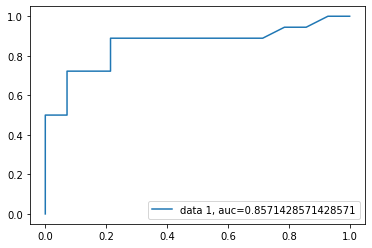

In [95]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = clf_xgb.predict_proba(X_test_select)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

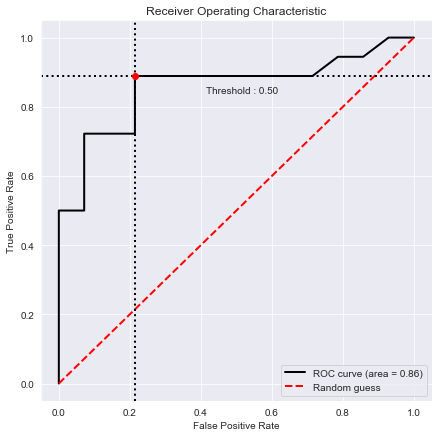

In [100]:
# pip install plot-metric
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()